# 11-12: MLE e Regressione Abalone

## Analisi di una distribuzione tramite MLE

In [1]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mu = 10
samples = poisson.rvs(mu=mu, size=100)
samples

array([12,  8,  8, 10, 14, 16, 11,  5, 15,  8,  9,  9,  9,  7, 13, 15, 11,
       11, 11,  6,  8,  8,  8, 10,  9,  9,  6, 13,  6,  8,  6, 11, 11,  9,
        8, 11, 14,  6, 10, 11, 11, 13,  5, 12, 10,  8,  8,  9,  6, 13, 11,
        4,  8, 15,  9,  7,  8,  8,  7, 10,  6, 10, 11,  5,  7, 13,  6,  9,
       14, 11, 14, 14, 13, 12,  7, 16, 11,  6,  5,  4,  8,  7, 14, 13,  9,
        8,  5,  8, 12,  8, 13, 12,  7, 14, 11,  9, 10,  5, 17, 15])

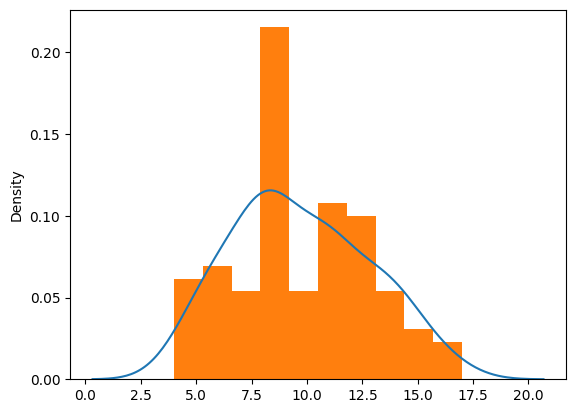

In [3]:
sns.kdeplot(samples)
plt.hist(samples, density=True)
plt.show()

In [4]:
lkls = []
for i in range(0, 100):
    lkls.append(np.round(poisson.logpmf(samples, mu=i).mean(),3))

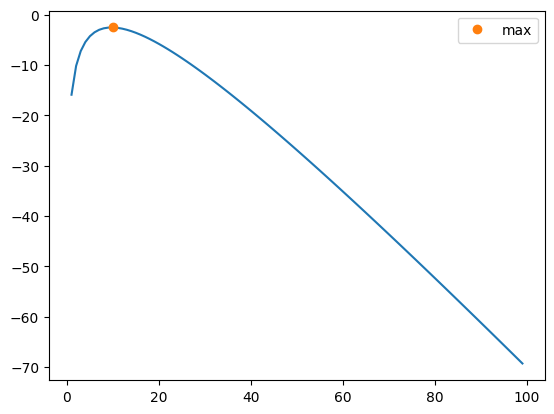

In [5]:
plt.plot(range(0,100), lkls)
plt.plot(lkls.index(max(lkls)), max(lkls),"o" ,label="max")
plt.legend()
plt.show()

In [6]:
lkls.index(max(lkls))

10

In [7]:
from scipy.optimize import minimize_scalar

In [8]:
get_lkl = lambda mu: poisson.logpmf(samples, mu=mu).mean() * -1
minimize_scalar(get_lkl, bracket=(0, 15))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 2.52735058697955
       x: 9.710000152660585
     nit: 11
    nfev: 14

In [9]:
samples.mean()

np.float64(9.71)

## Regressione Lineare su Abalone

In [10]:
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [11]:
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets.values

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB


In [13]:
np.unique(X["Sex"])

array(['F', 'I', 'M'], dtype=object)

In [14]:
X = pd.get_dummies(X, columns=['Sex'])

In [15]:
print(X.head(1))

   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095         0.514          0.2245           0.101   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0          0.15  False  False   True  


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[[2.46486711]]
[9.88207124]


In [19]:
f = lambda x: model.coef_ * x + model.intercept_

In [20]:
x = np.linspace(0.1, 100, 100)
y = f(x)

In [21]:
x

array([  0.1       ,   1.10909091,   2.11818182,   3.12727273,
         4.13636364,   5.14545455,   6.15454545,   7.16363636,
         8.17272727,   9.18181818,  10.19090909,  11.2       ,
        12.20909091,  13.21818182,  14.22727273,  15.23636364,
        16.24545455,  17.25454545,  18.26363636,  19.27272727,
        20.28181818,  21.29090909,  22.3       ,  23.30909091,
        24.31818182,  25.32727273,  26.33636364,  27.34545455,
        28.35454545,  29.36363636,  30.37272727,  31.38181818,
        32.39090909,  33.4       ,  34.40909091,  35.41818182,
        36.42727273,  37.43636364,  38.44545455,  39.45454545,
        40.46363636,  41.47272727,  42.48181818,  43.49090909,
        44.5       ,  45.50909091,  46.51818182,  47.52727273,
        48.53636364,  49.54545455,  50.55454545,  51.56363636,
        52.57272727,  53.58181818,  54.59090909,  55.6       ,
        56.60909091,  57.61818182,  58.62727273,  59.63636364,
        60.64545455,  61.65454545,  62.66363636,  63.67

In [22]:
y

array([[ 10.12855795,  12.61583294,  15.10310793,  17.59038292,
         20.07765791,  22.5649329 ,  25.05220789,  27.53948288,
         30.02675787,  32.51403286,  35.00130785,  37.48858284,
         39.97585783,  42.46313282,  44.95040781,  47.4376828 ,
         49.92495779,  52.41223278,  54.89950777,  57.38678276,
         59.87405775,  62.36133274,  64.84860773,  67.33588272,
         69.82315771,  72.3104327 ,  74.79770769,  77.28498268,
         79.77225767,  82.25953266,  84.74680765,  87.23408264,
         89.72135763,  92.20863262,  94.69590761,  97.1831826 ,
         99.67045759, 102.15773258, 104.64500757, 107.13228256,
        109.61955755, 112.10683254, 114.59410753, 117.08138252,
        119.56865751, 122.0559325 , 124.54320749, 127.03048248,
        129.51775747, 132.00503246, 134.49230745, 136.97958244,
        139.46685743, 141.95413242, 144.44140741, 146.9286824 ,
        149.41595739, 151.90323238, 154.39050737, 156.87778236,
        159.36505735, 161.85233235, 164.

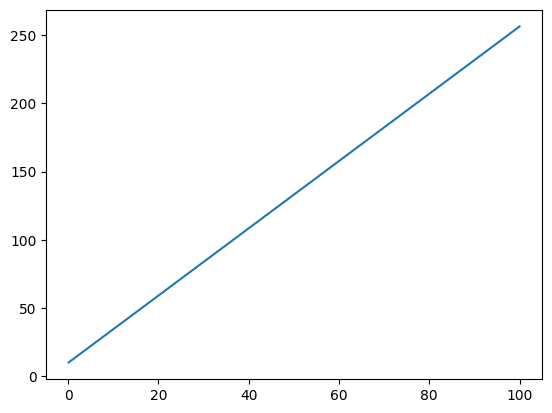

In [23]:
plt.plot(x,y[0])
plt.show()

In [24]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
ase = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [25]:
print(f"MSE: {round(mse,2)}")
print(f"ASE: {round(ase,2)}")
print(f"R^2: {round(r2,2)}")

MSE: 8.93
ASE: 2.08
R^2: 0.25
